### 情報工学工房 第2回レポート課題  
課題内容: 2層ニューラルネットワークの学習を試す。  

#### 試したこと1: ハイパーパラメータを調整して学習速度（認識精度の推移）への反応を調べる。
- 最適なlearning_rate はいくらか
iters_num = 10000, batch_size = 100 でlearning_rateを0.1～20の間で変化させると1～3の間で学習速度が最も早く3,4 epochでテストデータ認識精度95%を超えた。これよりlearning_rateが低くても高くても学習速度は遅くなった。約10.05を越えると最初の認識精度から精度が上がることはなかった。
learning rateを大きくとると認識精度が上がらなくなるのは勾配計算が発散するためと考えられる。
- 高epochで認識精度は向上するか
iters_num = 100000, learning_rate = 2 で batch_size = 100, 500, 2000 と変化させると、いずれも学習データ認識精度はepochに対して単調増加して100%に近づくにもかかわらず、テストデータ認識精度は97%から頭打ちとなり、最終epochでのテストデータ認識精度はぞれぞれ97.1, 97.5, 97.5%と大きな違いはなかった。むしろepoch数中盤の方がわずかに認識精度が良かった。バッチサイズを大きくしてもこの傾向は変わらなかった。 
このことから、高epochでは学習データの過学習が起きていると考えられる。batch_sizeを大きくすればテストデータ認識精度を上げることができると考えたが、試したbatch_sizeの範囲では効果は見られなかった。

#### 試したこと2: 別の勾配計算法network.numerical_gradient(x_batch, t_batch)を試す。
第1epoch結果が表示された後の結果が表示されなかった。数時間経過しても表示されず２つのマシンで試して同じ結果となった。原因特定に至らなかった。


#### 感想
写経をしながら一つ一つの処理を追っていくと予想以上に時間がかかってしまった。そして、勾配計算する関数を切り替えたときに計算が進まなくなったところは原因を特定できなかった。予習の段階で分からないところが分かるように、本やコードを眺めるだけでなくコードを実行してみることが大事だと感じた。


In [23]:
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        batch_num = x.shape[0]
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        dy = (y-t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)
        
        return grads

train acc, test acc | 0.10441666666666667, 0.1028
train acc, test acc | 0.6552666666666667, 0.6522
train acc, test acc | 0.8564833333333334, 0.8501
train acc, test acc | 0.8938, 0.8958
train acc, test acc | 0.8792333333333333, 0.8781
train acc, test acc | 0.8988666666666667, 0.8983
train acc, test acc | 0.9142166666666667, 0.915
train acc, test acc | 0.9210333333333334, 0.9171
train acc, test acc | 0.90575, 0.9046
train acc, test acc | 0.9273833333333333, 0.9226
train acc, test acc | 0.9303, 0.9236
train acc, test acc | 0.9337833333333333, 0.9298
train acc, test acc | 0.9349333333333333, 0.9271
train acc, test acc | 0.9358166666666666, 0.9317
train acc, test acc | 0.9370833333333334, 0.9295
train acc, test acc | 0.9356333333333333, 0.9262
train acc, test acc | 0.9411666666666667, 0.931


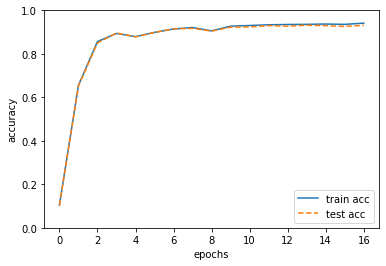

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 10.05

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
       
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i%iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()